# Maps of music tours
Example of script for making maps of music tour by singers based on Wikipedia information, using pandas, geopandas and geopy.

In [1]:
import pandas
import geopandas
from pyproj import CRS
import geoplot
import requests
from bs4 import BeautifulSoup
import geopy
from geopy.geocoders import Nominatim
from geopy.extra.rate_limiter import RateLimiter
import matplotlib.pyplot as plt

## Scraping data from Wikipedia page
Defining the target page with a table containing the tour date.

In [61]:
# Defining the url of the Wikipedia page to be scraped
page_url = 'https://en.wikipedia.org/wiki/The_Mrs._Carter_Show_World_Tour#Shows'

# Verifying the possibility to scrape the given page
response = requests.get(page_url)
print(response.status_code)

# Parse data from the html into a BeautifulSoup object
soup = BeautifulSoup(response.text, 'html.parser')

# Find all tables on the page
all_tables = soup.find_all('table', {'class': 'wikitable'})

200


In [65]:
# Initialize an empty list to store DataFrames
dfs = []
# Loop through all tables
for i, table in enumerate(all_tables):
    # Transforming the response into a pandas object
    df = pd.read_html(str(table))[0]  # Assuming the first table in each iteration
    
    # Rename 'Date(2013)' or 'Date(2014)' to a common name 'Date'
    df.rename(columns={'Date(2013)': 'Date', 'Date(2014)': 'Date'}, inplace=True)
    
    # Remove references from 'Revenue' column headers
    df.columns = [col.split('[')[0].strip() for col in df.columns]
    
    # Add a 'Table' column to identify the source table
    df['Table'] = i + 1
    
    # Append the DataFrame to the list
    dfs.append(df)

# Concatenate all DataFrames into a single DataFrame
result_df = pd.concat(dfs, ignore_index=True)

# Display the combined DataFrame
print(result_df.head())

       Date        City      Country                Venue    Opening acts  \
0  April 15    Belgrade       Serbia        Kombank Arena             NaN   
1  April 17      Zagreb      Croatia         Arena Zagreb  Franka Batelić   
2  April 19  Bratislava     Slovakia  Ondrej Nepela Arena             NaN   
3  April 21   Amsterdam  Netherlands           Ziggo Dome      Eva Simons   
4  April 22   Amsterdam  Netherlands           Ziggo Dome      Eva Simons   

        Attendance     Revenue  Table Date(2013  
0  16,719 / 16,719    $834,621      1       NaN  
1  16,920 / 16,920    $932,089      1       NaN  
2    8,770 / 8,770  $1,163,637      1       NaN  
3  30,897 / 31,600  $2,559,806      1       NaN  
4  30,897 / 31,600  $2,559,806      1       NaN  


In [66]:
result_df.shape[0]

133

In [62]:
# Loop through all tables
for i, table in enumerate(all_tables):
    # Transforming the response into a pandas object
    df = pd.read_html(str(table))
    
    # Converting list to DataFrame
    df = pd.DataFrame(df[0])
    
    # Display the DataFrame for the current table
    print(f"Table {i+1}:\n", df.head(), "\n")

    # Checking column titles for the current table
    print(f"Column titles for Table {i+1}:\n", df.columns, "\n")

Table 1:
   Date(2013)        City      Country                Venue    Opening acts  \
0   April 15    Belgrade       Serbia        Kombank Arena             NaN   
1   April 17      Zagreb      Croatia         Arena Zagreb  Franka Batelić   
2   April 19  Bratislava     Slovakia  Ondrej Nepela Arena             NaN   
3   April 21   Amsterdam  Netherlands           Ziggo Dome      Eva Simons   
4   April 22   Amsterdam  Netherlands           Ziggo Dome      Eva Simons   

        Attendance Revenue[123][124][125]  
0  16,719 / 16,719               $834,621  
1  16,920 / 16,920               $932,089  
2    8,770 / 8,770             $1,163,637  
3  30,897 / 31,600             $2,559,806  
4  30,897 / 31,600             $2,559,806   

Column titles for Table 1:
 Index(['Date(2013)', 'City', 'Country', 'Venue', 'Opening acts', 'Attendance',
       'Revenue[123][124][125]'],
      dtype='object') 

Table 2:
    Date(2013)           City        Country                    Venue  \
0  June 

In [63]:
df.head()

,Date(2014),City,Country,Venue,Opening acts,Attendance,Revenue[93][142][143]
0,February 20,Glasgow,Scotland,SSE Hydro,Monsieur Adi,"23,850 / 23,850","$2,898,560"
1,February 21,Glasgow,Scotland,SSE Hydro,Monsieur Adi,"23,850 / 23,850","$2,898,560"
2,February 23,Birmingham,England,LG Arena,Monsieur Adi,"29,006 / 29,006","$3,400,510"
3,February 24,Birmingham,England,LG Arena,Sam Bailey,"29,006 / 29,006","$3,400,510"
4,February 25,Manchester,England,Phones 4u Arena,Monsieur Adi,"30,119 / 30,119","$3,553,940"


In [5]:
# Transforming the response into a pandas object
df=pandas.read_html(str(tour_places))
# Converting list to dataframe
df=pandas.DataFrame(df[0])
df.head()
df.tail()

,Date(2013),City,Country,Venue,Opening acts,Attendance,Revenue[123][124][125]
28,May 27,Copenhagen,Denmark,Forum Copenhagen,Luke James,"9,890 / 9,890","$1,052,082"
29,May 28,Oslo,Norway,Telenor Arena,LidoLido,"21,989 / 21,989","$2,204,442"
30,May 29,Stockholm,Sweden,Ericsson Globe,Luke James,"13,934 / 13,934","$1,318,690"
31,May 31[c],Antwerp,Belgium,Sportpaleis,Luke James,[a],[a]
32,June 1,London,England,Twickenham Stadium,NaN,"45,060 / 45,060","$5,132,599"


In [6]:
# Checking column titles
df.columns

Index(['Date(2013)', 'City', 'Country', 'Venue', 'Opening acts', 'Attendance',
       'Revenue[123][124][125]'],
      dtype='object')

In [28]:
# Renaming Revenue column
df.rename(columns={'Revenue[123][124][125]': 'Revenue'}, inplace=True)
# Creating a new dataframe containing only the columns of interest
new_df = df[['Date(2013)', 'City', 'Country','Venue', 'Attendance', 'Revenue']]
# Removing the last row contatining the Total
#new_df = new_df.drop([139])
new_df.shape[0]

33

In [29]:
# Replacing text values containing a comma
new_df = new_df.replace('Washington, D.C.', 'Washington D.C.')

In [30]:
# Creating new column in the dataframe with the addresses
new_df['location'] = new_df['City'] + ', ' + new_df['Country']
new_df['location']

0           Belgrade, Serbia
1            Zagreb, Croatia
2       Bratislava, Slovakia
3     Amsterdam, Netherlands
4     Amsterdam, Netherlands
5              Paris, France
6              Paris, France
7        Birmingham, England
8        Birmingham, England
9            London, England
10           London, England
11           London, England
12           London, England
13           London, England
14           London, England
15       Manchester, England
16       Manchester, England
17       Manchester, England
18           Dublin, Ireland
19           Dublin, Ireland
20          Antwerp, Belgium
21       Zürich, Switzerland
22              Milan, Italy
23       Montpellier, France
24           Munich, Germany
25           Berlin, Germany
26           Berlin, Germany
27            Warsaw, Poland
28       Copenhagen, Denmark
29              Oslo, Norway
30         Stockholm, Sweden
31          Antwerp, Belgium
32           London, England
Name: location, dtype: object

In [31]:
new_df.head()

,Date(2013),City,Country,Venue,Attendance,Revenue,location
0,April 15,Belgrade,Serbia,Kombank Arena,"16,719 / 16,719","$834,621","Belgrade, Serbia"
1,April 17,Zagreb,Croatia,Arena Zagreb,"16,920 / 16,920","$932,089","Zagreb, Croatia"
2,April 19,Bratislava,Slovakia,Ondrej Nepela Arena,"8,770 / 8,770","$1,163,637","Bratislava, Slovakia"
3,April 21,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands"
4,April 22,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands"


In [32]:
# Defining the locator element
locator = Nominatim(user_agent='prova')
# Defining a function to delay between geocoding calls
geocode = RateLimiter(locator.geocode, min_delay_seconds=1.5)
# Creating location column
new_df['location2'] = new_df['location'].apply(geocode)
# Creating longitude, laatitude and altitude from location column (returns tuple)
new_df['point'] = new_df['location2'].apply(lambda loc: tuple(loc.point) if loc else None)
# Splitting point column into latitude, longitude and altitude columns
new_df[['latitude', 'longitude', 'altitude']] = pandas.DataFrame(new_df['point'].tolist(), index=new_df.index)

In [33]:
new_df.head()

,Date(2013),City,Country,Venue,Attendance,Revenue,location,location2,point,latitude,longitude,altitude
0,April 15,Belgrade,Serbia,Kombank Arena,"16,719 / 16,719","$834,621","Belgrade, Serbia","(Београд, Град Београд, Централна Србија, Срби...","(44.8178131, 20.4568974, 0.0)",44.817813,20.456897,0.0
1,April 17,Zagreb,Croatia,Arena Zagreb,"16,920 / 16,920","$932,089","Zagreb, Croatia","(Grad Zagreb, Hrvatska, (45.8130967, 15.9772795))","(45.8130967, 15.9772795, 0.0)",45.813097,15.977279,0.0
2,April 19,Bratislava,Slovakia,Ondrej Nepela Arena,"8,770 / 8,770","$1,163,637","Bratislava, Slovakia","(Bratislava, Bratislavský kraj, Slovensko, (48...","(48.15926025, 17.139658691421687, 0.0)",48.159260,17.139659,0.0
3,April 21,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0
4,April 22,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0


In [34]:
# Checking the presence of null values
new_df['latitude'].isna().sum()

0

In [35]:
# Checking rows where the geolocator failed to attach coordinates values
new_df[new_df['latitude'].isna()]

,Date(2013),City,Country,Venue,Attendance,Revenue,location,location2,point,latitude,longitude,altitude


In [36]:
# Cleaning the dataframe by removing the not relevant null values
new_df = new_df[new_df['latitude'].notna()]
new_df.reset_index(drop=True, inplace=True)
new_df.head()

,Date(2013),City,Country,Venue,Attendance,Revenue,location,location2,point,latitude,longitude,altitude
0,April 15,Belgrade,Serbia,Kombank Arena,"16,719 / 16,719","$834,621","Belgrade, Serbia","(Београд, Град Београд, Централна Србија, Срби...","(44.8178131, 20.4568974, 0.0)",44.817813,20.456897,0.0
1,April 17,Zagreb,Croatia,Arena Zagreb,"16,920 / 16,920","$932,089","Zagreb, Croatia","(Grad Zagreb, Hrvatska, (45.8130967, 15.9772795))","(45.8130967, 15.9772795, 0.0)",45.813097,15.977279,0.0
2,April 19,Bratislava,Slovakia,Ondrej Nepela Arena,"8,770 / 8,770","$1,163,637","Bratislava, Slovakia","(Bratislava, Bratislavský kraj, Slovensko, (48...","(48.15926025, 17.139658691421687, 0.0)",48.159260,17.139659,0.0
3,April 21,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0
4,April 22,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0


In [37]:
# Create geodataframe from dataframe
gdf = geopandas.GeoDataFrame(new_df, geometry=geopandas.points_from_xy(new_df.longitude, new_df.latitude))

In [38]:
gdf.head()

,Date(2013),City,Country,Venue,Attendance,Revenue,location,location2,point,latitude,longitude,altitude,geometry
0,April 15,Belgrade,Serbia,Kombank Arena,"16,719 / 16,719","$834,621","Belgrade, Serbia","(Београд, Град Београд, Централна Србија, Срби...","(44.8178131, 20.4568974, 0.0)",44.817813,20.456897,0.0,POINT (20.45690 44.81781)
1,April 17,Zagreb,Croatia,Arena Zagreb,"16,920 / 16,920","$932,089","Zagreb, Croatia","(Grad Zagreb, Hrvatska, (45.8130967, 15.9772795))","(45.8130967, 15.9772795, 0.0)",45.813097,15.977279,0.0,POINT (15.97728 45.81310)
2,April 19,Bratislava,Slovakia,Ondrej Nepela Arena,"8,770 / 8,770","$1,163,637","Bratislava, Slovakia","(Bratislava, Bratislavský kraj, Slovensko, (48...","(48.15926025, 17.139658691421687, 0.0)",48.159260,17.139659,0.0,POINT (17.13966 48.15926)
3,April 21,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0,POINT (4.89245 52.37308)
4,April 22,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0,POINT (4.89245 52.37308)


In [39]:
# Adding world base map
world = geopandas.read_file('ne_10m_admin_0_countries.shp')

<AxesSubplot:>

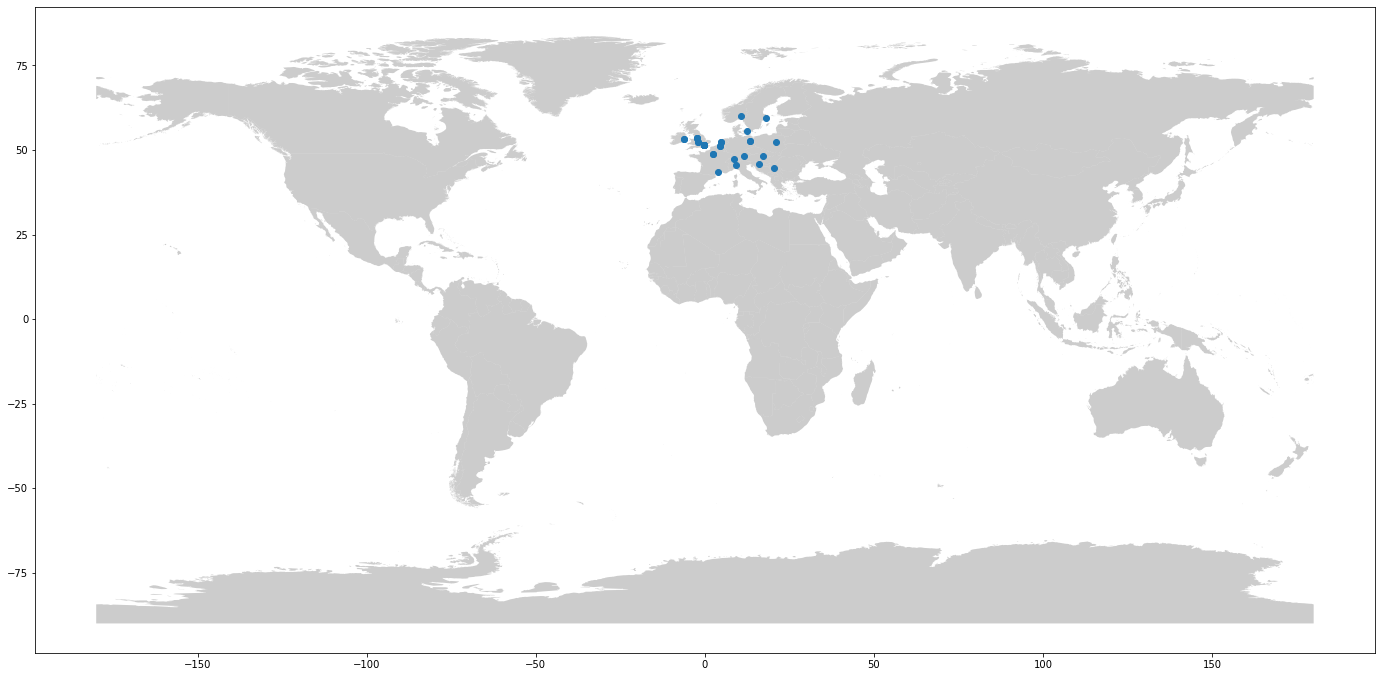

In [40]:
#Plotting results
fig, ax = plt.subplots(figsize=(24,18))
world.plot(ax=ax, alpha=0.4, color='grey')
gdf.plot(ax=ax)

In [43]:
gdf.columns

Index(['Date', 'City', 'Country', 'Venue', 'Attendance', 'Revenue', 'location',
       'location2', 'point', 'latitude', 'longitude', 'altitude', 'geometry'],
      dtype='object')

In [42]:
gdf.columns
col_rename= {"Date(2013)": "Date"}
gdf.columns = ['Date', 'City', 'Country', 'Venue', 'Attendance', 'Revenue', 'location', 'location2', 'point', 'latitude', 'longitude', 'altitude', 'geometry']
gdf.head()

,Date,City,Country,Venue,Attendance,Revenue,location,location2,point,latitude,longitude,altitude,geometry
0,April 15,Belgrade,Serbia,Kombank Arena,"16,719 / 16,719","$834,621","Belgrade, Serbia","(Београд, Град Београд, Централна Србија, Срби...","(44.8178131, 20.4568974, 0.0)",44.817813,20.456897,0.0,POINT (20.45690 44.81781)
1,April 17,Zagreb,Croatia,Arena Zagreb,"16,920 / 16,920","$932,089","Zagreb, Croatia","(Grad Zagreb, Hrvatska, (45.8130967, 15.9772795))","(45.8130967, 15.9772795, 0.0)",45.813097,15.977279,0.0,POINT (15.97728 45.81310)
2,April 19,Bratislava,Slovakia,Ondrej Nepela Arena,"8,770 / 8,770","$1,163,637","Bratislava, Slovakia","(Bratislava, Bratislavský kraj, Slovensko, (48...","(48.15926025, 17.139658691421687, 0.0)",48.159260,17.139659,0.0,POINT (17.13966 48.15926)
3,April 21,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0,POINT (4.89245 52.37308)
4,April 22,Amsterdam,Netherlands,Ziggo Dome,"30,897 / 31,600","$2,559,806","Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0,POINT (4.89245 52.37308)


In [52]:
gdf['Revenue'] = gdf['Revenue'].str.replace(',', '')
gdf['Revenue'] = gdf['Revenue'].str.replace("a", '')
#gdf['Revenue[123][124][125]'] = gdf['Revenue[123][124][125]'].str.replace("k", '')
gdf['Revenue'] = gdf['Revenue'].str.replace("[", '')
gdf['Revenue'] = gdf['Revenue'].str.replace("]", '')
#gdf['Revenue[123][124][125]'] = gdf['Revenue[123][124][125]'].astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3480\1073210779.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gdf['Revenue'] = gdf['Revenue'].str.replace("[", '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_3480\1073210779.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gdf['Revenue'] = gdf['Revenue'].str.replace("]", '')


In [53]:
gdf.tail(100)

,Date,City,Country,Venue,Attendance,Revenue,location,location2,point,latitude,longitude,altitude,geometry
0,April 15,Belgrade,Serbia,Kombank Arena,16719,$834621,"Belgrade, Serbia","(Београд, Град Београд, Централна Србија, Срби...","(44.8178131, 20.4568974, 0.0)",44.817813,20.456897,0.0,POINT (20.45690 44.81781)
1,April 17,Zagreb,Croatia,Arena Zagreb,16920,$932089,"Zagreb, Croatia","(Grad Zagreb, Hrvatska, (45.8130967, 15.9772795))","(45.8130967, 15.9772795, 0.0)",45.813097,15.977279,0.0,POINT (15.97728 45.81310)
2,April 19,Bratislava,Slovakia,Ondrej Nepela Arena,8770,$1163637,"Bratislava, Slovakia","(Bratislava, Bratislavský kraj, Slovensko, (48...","(48.15926025, 17.139658691421687, 0.0)",48.159260,17.139659,0.0,POINT (17.13966 48.15926)
3,April 21,Amsterdam,Netherlands,Ziggo Dome,30897,$2559806,"Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0,POINT (4.89245 52.37308)
4,April 22,Amsterdam,Netherlands,Ziggo Dome,30897,$2559806,"Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0,POINT (4.89245 52.37308)
5,April 24,Paris,France,Palais omnisports de Paris-Bercy,30866,$2338754,"Paris, France","(Paris, Île-de-France, France métropolitaine, ...","(48.8534951, 2.3483915, 0.0)",48.853495,2.348391,0.0,POINT (2.34839 48.85350)
6,April 25,Paris,France,Palais omnisports de Paris-Bercy,30866,$2338754,"Paris, France","(Paris, Île-de-France, France métropolitaine, ...","(48.8534951, 2.3483915, 0.0)",48.853495,2.348391,0.0,POINT (2.34839 48.85350)
7,April 26,Birmingham,England,LG Arena,29046,$2952937,"Birmingham, England","(Birmingham, West Midlands Combined Authority,...","(52.4796992, -1.9026911, 0.0)",52.479699,-1.902691,0.0,POINT (-1.90269 52.47970)
8,April 27,Birmingham,England,LG Arena,29046,$2952937,"Birmingham, England","(Birmingham, West Midlands Combined Authority,...","(52.4796992, -1.9026911, 0.0)",52.479699,-1.902691,0.0,POINT (-1.90269 52.47970)
9,April 29,London,England,The O2 Arena,97082,$9985780,"London, England","(London, Greater London, England, United Kingd...","(51.5074456, -0.1277653, 0.0)",51.507446,-0.127765,0.0,POINT (-0.12777 51.50745)


In [54]:
gdf['Attendance'] = gdf['Attendance'].str.split(' / ').str[0]
gdf['Attendance'] = gdf['Attendance'].str.replace(',', '')
gdf['Attendance'] = gdf['Attendance'].str.replace('[', '')
gdf['Attendance'] = gdf['Attendance'].str.replace(']', '')
#gdf['Attendance'] = gdf['Attendance'].str.replace('a', '')
#gdf['Attendance'] = gdf['Attendance'].str.replace('k', '')
#gdf['Attendance'] = gdf['Attendance'].astype(int)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3480\1860509924.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gdf['Attendance'] = gdf['Attendance'].str.replace('[', '')
C:\Users\Admin\AppData\Local\Temp\ipykernel_3480\1860509924.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  gdf['Attendance'] = gdf['Attendance'].str.replace(']', '')


In [55]:
gdf.head()

,Date,City,Country,Venue,Attendance,Revenue,location,location2,point,latitude,longitude,altitude,geometry
0,April 15,Belgrade,Serbia,Kombank Arena,16719,$834621,"Belgrade, Serbia","(Београд, Град Београд, Централна Србија, Срби...","(44.8178131, 20.4568974, 0.0)",44.817813,20.456897,0.0,POINT (20.45690 44.81781)
1,April 17,Zagreb,Croatia,Arena Zagreb,16920,$932089,"Zagreb, Croatia","(Grad Zagreb, Hrvatska, (45.8130967, 15.9772795))","(45.8130967, 15.9772795, 0.0)",45.813097,15.977279,0.0,POINT (15.97728 45.81310)
2,April 19,Bratislava,Slovakia,Ondrej Nepela Arena,8770,$1163637,"Bratislava, Slovakia","(Bratislava, Bratislavský kraj, Slovensko, (48...","(48.15926025, 17.139658691421687, 0.0)",48.159260,17.139659,0.0,POINT (17.13966 48.15926)
3,April 21,Amsterdam,Netherlands,Ziggo Dome,30897,$2559806,"Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0,POINT (4.89245 52.37308)
4,April 22,Amsterdam,Netherlands,Ziggo Dome,30897,$2559806,"Amsterdam, Netherlands","(Amsterdam, Noord-Holland, Nederland, (52.3730...","(52.3730796, 4.8924534, 0.0)",52.373080,4.892453,0.0,POINT (4.89245 52.37308)


In [56]:
new=gdf.copy()

In [58]:
for i in range(len(gdf)):
    fig = plt.figure(facecolor="black")
    fig, ax = plt.subplots(figsize=(15, 15))
    lat = gdf.latitude[i]
    lon = gdf.longitude[i]
    ortho = CRS.from_proj4("+proj=ortho +lat_0={} +lon_0={} +x_0=0 +y_0=0 +a=6370997 +b=6370997 +units=m +no_defs".format(lat, lon))
    ortho = world.to_crs(ortho)
    plt.style.context('Solarize_Light2')
    new.loc[[i], 'geometry'].buffer(6400000).plot(
        color='#F3F4ED',
        alpha=0.9, 
        edgecolor='black',
        ax=ax,
        linewidth=2,
    )
    ortho.plot(
        color='#536162',
        edgecolor='none',
        ax=ax,
    )
    gdf.loc[[i], 'geometry'].plot(
        facecolors='#FF5F00', 
        ax=ax, 
        #alpha=0.9, 
        edgecolor='#FF5F00', 
        linewidth=0.7,
    )
    plt.title(str(gdf.iloc[i]['location']) + ' - ' + str(gdf.iloc[i]['Date']),  fontname="Special Elite", color="black", fontsize="20")
    plt.axis('off')
    filename = "images/fig" + str(i) + ".jpg"
    fig.savefig(filename)
    plt.close(fig)

C:\Users\Admin\AppData\Local\Temp\ipykernel_3480\2717374580.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize=(15, 15))
C:\Users\Admin\AppData\Local\Temp\ipykernel_3480\2717374580.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(facecolor="black")


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>